In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('/Users/jacob/OneDrive - Cal Poly/coding/python/figure_template/publication/plot.mplstyle')

In [51]:
# Plasmid used for Cas9 expression: pSQT817, 
data = pd.read_csv('guideseq_data.csv', header = 0)
filtered_data = data[data.iloc[:,10] < 5] # Only off-targets with 4 or less mismatches
filtered_data[filtered_data['Targetsite'] == 'EMX1']

,#Chromosome,Start,End,Name,GUIDE-Seq Reads,Strand,Cells,Targetsite,Target_Sequence,Offtarget_Sequence,20 bp protospacer # mismatches,3 bp PAM # mismatches,Mismatch Total
234,chr2,73160981,73161004,EMX1_chr2_73160998_4521,4521,+,U2OS,EMX1,GAGTCCGAGCAGAAGAAGAANGG,GAGTCCGAGCAGAAGAAGAAGGG,0,0,0
235,chr5,45359060,45359083,EMX1_chr5_45359067_3123,3123,-,U2OS,EMX1,GAGTCCGAGCAGAAGAAGAANGG,GAGTTAGAGCAGAAGAAGAAAGG,2,0,2
236,chr15,44109746,44109769,EMX1_chr15_44109763_1445,1445,+,U2OS,EMX1,GAGTCCGAGCAGAAGAAGAANGG,GAGTCTAAGCAGAAGAAGAAGAG,2,1,3
237,chr2,219845055,219845078,EMX1_chr2_219845072_700,700,+,U2OS,EMX1,GAGTCCGAGCAGAAGAAGAANGG,GAGGCCGAGCAGAAGAAAGACGG,3,0,3
238,chr8,128801241,128801264,EMX1_chr8_128801258_390,390,+,U2OS,EMX1,GAGTCCGAGCAGAAGAAGAANGG,GAGTCCTAGCAGGAGAAGAAGAG,2,1,3
239,chr5,9227145,9227168,EMX1_chr5_9227162_258,258,+,U2OS,EMX1,GAGTCCGAGCAGAAGAAGAANGG,AAGTCTGAGCACAAGAAGAATGG,3,0,3
240,chrX,53467704,53467727,EMX1_chrX_53467711_216,216,-,U2OS,EMX1,GAGTCCGAGCAGAAGAAGAANGG,GAGTCCGGGAAGGAGAAGAAAGG,3,0,3
241,chr5,146833183,146833206,EMX1_chr5_146833190_143,143,-,U2OS,EMX1,GAGTCCGAGCAGAAGAAGAANGG,GAGCCGGAGCAGAAGAAGGAGGG,3,0,3
242,chr1,23720611,23720634,EMX1_chr1_23720617_102,102,-,U2OS,EMX1,GAGTCCGAGCAGAAGAAGAANGG,AAGTCCGAGGAGAGGAAGAAAGG,3,0,3
243,chr3,5031597,5031620,EMX1_chr3_5031614_67,67,+,U2OS,EMX1,GAGTCCGAGCAGAAGAAGAANGG,GAATCCAAGCAGGAGAAGAAGGA,3,1,4


In [46]:
def parse_crisproff(filename):
    file = open('crisproff/' + filename)
    for i in range(9):
        file.readline()
    lines = []
    for i in range(10000):
        line = file.readline().split('\t')
        if line[6] == 'CRITICAL':
            lines.append(line[3])
    return lines
    
def parse_crispor(filename):
    ots = []
    file = open('crispor/' + filename + '.tsv')
    file.readline()
    lines = file.readlines()
    for line in lines:
        ots.append(line.split('\t')[2])
    return ots

def parse_cas_offinder(filename):
    ots = []
    file = open('cas_offinder/' + filename + '.txt')
    file.readline()
    lines = file.readlines()
    for line in lines:
        ots.append(line.split('\t')[2].upper())
    return ots

In [50]:
sites = data['Targetsite'].unique()
def get_matches(sites, data):
    donuts = {}
    for site in sites:
        donut = [0, 0, 0]
        ot_seqs = parse_cas_offinder(site)
        for ot in ot_seqs:
            if site in filtered_data[filtered_data['Targetsite'] == site].iloc[:,9]:
                donut[0] += 1
            else:
                donut[2] += 1
        donut[1] = len(filtered_data[filtered_data['Targetsite'] == site].iloc[:, 1]) - donut[0]
        donuts[site] = donut
    return donuts
get_matches(sites, filtered_data)

{'VEGFA_site1': [0, 17, 322],
 'VEGFA_site2': [0, 81, 494],
 'VEGFA_site3': [0, 59, 1402],
 'EMX1': [0, 16, 293],
 'FANCF': [0, 9, 308],
 'RNF2': [0, 1, 123],
 'HEK293_sgRNA1': [0, 9, 101],
 'HEK293_sgRNA2': [0, 3, 157],
 'HEK293_sgRNA3': [0, 6, 106],
 'HEK293_sgRNA4': [0, 121, 828],
 'tru_VEGFA_site1': [0, 10, 1167],
 'tru_VEGFA_site3': [0, 16, 2360],
 'tru_EMX1': [0, 4, 1172]}

Text(0.5, 1.0, 'VEGFA site 1')

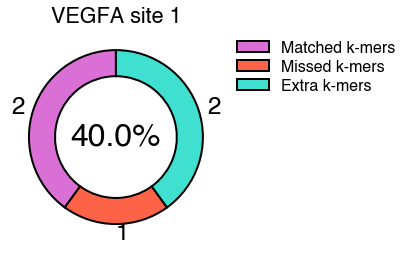

In [3]:
a = [2, 1, 2]
clrs = ['orchid', 'tomato', 'turquoise']
plt.pie(a, labels = [str(i) for i in a], startangle = 90, colors = clrs, wedgeprops = {'width': 0.3, 'edgecolor': 'k', 'linewidth': 2}, textprops = {'fontsize': 24})
plt.text(0, 0, f'{a[0] * 100 / sum(a):.1f}%', ha = 'center', va = 'center', fontsize = 32)
plt.legend(['Matched k-mers', 'Missed k-mers', 'Extra k-mers'], bbox_to_anchor = (1, 1))
plt.title('VEGFA site 1')